In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


In [2]:
train=pd.read_excel("Data_Train.xlsx")

In [3]:
test=pd.read_excel("Data_Test.xlsx")

In [4]:
train.head(2)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes


In [5]:
train.shape

(11094, 9)

In [6]:
test.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews
0,ID_2842,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese, Assamese",₹350,₹50,4.2,361,225
1,ID_730,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Kebab",₹100,₹50,NEW,-,-
2,ID_4620,"Sector 1, Noida",Fast Food,₹100,₹50,3.6,36,16
3,ID_5470,"Babarpur, New Delhi, Delhi","Mithai, North Indian, Chinese, Fast Food, Sout...",₹200,₹50,3.6,66,33
4,ID_3249,"Sector 1, Noida","Chinese, Fast Food",₹150,₹50,2.9,38,14


In [7]:
data=pd.concat([train,test],axis=0)

In [8]:
data.head(10)

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
0,₹200,"Fast Food, Rolls, Burger, Salad, Wraps",30 minutes,"FTI College, Law College Road, Pune",₹50,3.5,ID_6321,4,12
1,₹100,"Ice Cream, Desserts",30 minutes,"Sector 3, Marathalli",₹50,3.5,ID_2882,4,11
2,₹150,"Italian, Street Food, Fast Food",65 minutes,Mumbai Central,₹50,3.6,ID_1595,30,99
3,₹250,"Mughlai, North Indian, Chinese",30 minutes,"Sector 1, Noida",₹99,3.7,ID_5929,95,176
4,₹200,"Cafe, Beverages",65 minutes,"Rmz Centennial, I Gate, Whitefield",₹99,3.2,ID_6123,235,521
5,₹150,"South Indian, North Indian, Chinese",30 minutes,"Rmz Centennial, I Gate, Whitefield",₹50,3.8,ID_5221,18,46
6,₹150,"Beverages, Fast Food",30 minutes,Mumbai Central,₹50,3.7,ID_3777,31,108
7,₹650,"Chinese, Thai, Asian",45 minutes,Delhi University-GTB Nagar,₹50,4.0,ID_745,1235,1731
8,₹100,"Mithai, Street Food",30 minutes,Delhi University-GTB Nagar,₹50,3.9,ID_2970,26,110
9,₹200,"Fast Food, North Indian, Rolls, Chinese, Momos...",65 minutes,"Sector 1, Noida",₹50,3.9,ID_3474,294,562


In [9]:
data.shape

(13868, 9)

## Average Time

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13868 entries, 0 to 2773
Data columns (total 9 columns):
Average_Cost     13868 non-null object
Cuisines         13868 non-null object
Delivery_Time    11094 non-null object
Location         13868 non-null object
Minimum_Order    13868 non-null object
Rating           13868 non-null object
Restaurant       13868 non-null object
Reviews          13868 non-null object
Votes            13868 non-null object
dtypes: object(9)
memory usage: 1.1+ MB


In [11]:
data["Average_Cost"].value_counts()

₹200      4061
₹100      3221
₹150      3051
₹250      1104
₹300       710
₹350       354
₹400       346
₹50        337
₹600       184
₹500       116
₹550        73
₹450        72
₹650        63
₹800        50
₹750        41
₹700        19
₹1,000      16
₹850        16
₹900        15
₹1,200      10
₹950         4
for          1
₹1,100       1
₹1,400       1
₹1,150       1
₹2,050       1
Name: Average_Cost, dtype: int64

In [12]:
data.Average_Cost.isna().sum()

0

In [13]:
data.duplicated().sum()

0

In [14]:
import re

In [15]:
data.Average_Cost=data.Average_Cost.transform(lambda x:x.replace("₹",""))

In [16]:
data.Average_Cost=data.Average_Cost.transform(lambda x:x.replace(",",""))

In [17]:
data.Average_Cost=data.Average_Cost.transform(lambda x:x.replace("for",0)).astype(int)

In [18]:
data.Average_Cost=data.Average_Cost.transform(lambda x:x.replace("0",x.mean()))

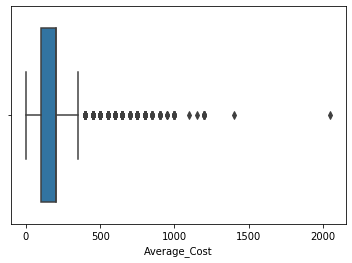

In [19]:
sns.boxplot(data.Average_Cost)

In [20]:
data[data["Average_Cost"]==2050]

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes
9891,2050,"Continental, North Indian, Italian, Asian",30 minutes,"Delhi High Court, India Gate",₹50,3.9,ID_33,357,671


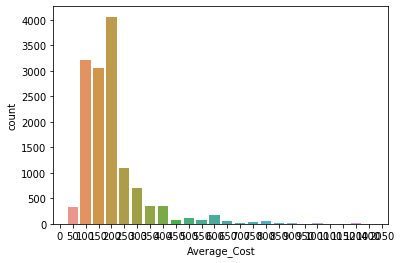

In [21]:
sns.countplot(data.Average_Cost)

## Ratings

In [22]:
data["Rating"].value_counts()

-                     1496
3.7                   1081
3.6                   1069
3.5                   1015
3.8                    983
3.9                    965
NEW                    958
3.4                    903
3.3                    828
4.0                    755
3.2                    640
4.1                    574
3.1                    531
3.0                    367
4.2                    342
4.3                    299
2.9                    256
2.8                    198
4.4                    171
2.7                     98
4.5                     96
2.6                     51
4.6                     48
4.7                     42
2.5                     33
2.4                     18
4.8                     16
Opening Soon            14
2.3                      8
4.9                      8
Temporarily Closed       2
2.1                      2
2.2                      1
Name: Rating, dtype: int64

In [23]:
data.Rating=data.Rating.transform(lambda x:x.replace({"-":np.nan,"Opening Soon":np.nan,"Temporarily Closed":np.nan,"NEW":np.nan}))

In [24]:
data.Rating.isna().sum()


2470

In [25]:
data.Rating=data.Rating.astype(float)

In [26]:
data.Rating=data.Rating.transform(lambda x:x.fillna(x.mean()))

In [27]:
data.Rating=data.Rating.transform(lambda x: round(x,1))

In [28]:
data.Rating.value_counts()

3.6    3539
3.7    1081
3.5    1015
3.8     983
3.9     965
3.4     903
3.3     828
4.0     755
3.2     640
4.1     574
3.1     531
3.0     367
4.2     342
4.3     299
2.9     256
2.8     198
4.4     171
2.7      98
4.5      96
2.6      51
4.6      48
4.7      42
2.5      33
2.4      18
4.8      16
2.3       8
4.9       8
2.1       2
2.2       1
Name: Rating, dtype: int64

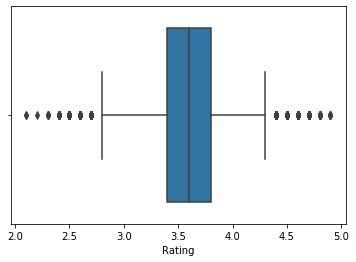

In [29]:
sns.boxplot(data.Rating)

In [30]:
data.columns

Index(['Average_Cost', 'Cuisines', 'Delivery_Time', 'Location',
       'Minimum_Order', 'Rating', 'Restaurant', 'Reviews', 'Votes'],
      dtype='object')

## REviews

In [31]:
data.Reviews.value_counts()

-       2905
2        551
1        483
3        466
4        428
5        320
7        264
6        260
8        242
9        239
10       223
11       193
12       169
14       158
13       157
23       141
15       138
18       136
17       131
16       128
24       113
30       111
20       109
22        99
19        92
26        90
21        88
25        86
32        86
31        86
        ... 
569        1
938        1
1263       1
828        1
1798       1
1085       1
3718       1
1211       1
2098       1
801        1
559        1
478        1
1252       1
550        1
226        1
1845       1
1948       1
376        1
652        1
2155       1
1313       1
392        1
574        1
726        1
602        1
1787       1
3863       1
681        1
418        1
1073       1
Name: Reviews, Length: 811, dtype: int64

In [32]:
data.Reviews=data.Reviews.transform(lambda x:x.replace("-",0))

In [33]:
data.Reviews=data.Reviews.astype(int)

In [34]:
data.Reviews=data.Reviews.replace(0,np.nan)

In [35]:
data.Reviews=data.Reviews.transform(lambda x:x.fillna(x.mean())).astype(int)

In [36]:
data.Reviews

0          4
1          4
2         30
3         95
4        235
5         18
6         31
7       1235
8         26
9        294
10        61
11      1239
12       120
13       128
14         5
15        53
16       120
17        47
18       120
19        46
20        23
21       160
22         2
23        26
24         1
25       120
26        38
27         9
28        19
29        18
        ... 
2744       3
2745     159
2746     318
2747       1
2748     120
2749      59
2750       6
2751      42
2752       4
2753       5
2754      70
2755     120
2756       7
2757     120
2758     249
2759     120
2760     120
2761     120
2762      41
2763     731
2764       8
2765     192
2766       5
2767       4
2768      12
2769     120
2770       1
2771       1
2772       2
2773      30
Name: Reviews, Length: 13868, dtype: int32

In [37]:
data.corr()

,Average_Cost,Rating,Reviews
Average_Cost,1.000000,0.342731,0.441993
Rating,0.342731,1.000000,0.422392
Reviews,0.441993,0.422392,1.000000


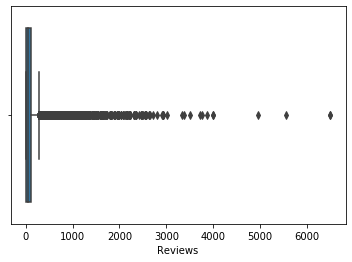

In [38]:
sns.boxplot(data.Reviews)

In [39]:
data.describe()

,Average_Cost,Rating,Reviews
count,13868.000000,13868.000000,13868.000000
mean,201.229449,3.608869,120.705942
std,126.957603,0.374883,280.595142
min,0.000000,2.100000,1.000000
25%,100.000000,3.400000,10.000000
50%,200.000000,3.600000,48.000000
75%,200.000000,3.800000,120.000000
max,2050.000000,4.900000,6504.000000


In [49]:
data.Delivery_Time.unique()

array(['30 minutes', '65 minutes', '45 minutes', '10 minutes',
       '20 minutes', '120 minutes', '80 minutes', 'nan'], dtype=object)

In [53]:
train.Delivery_Time=train.Delivery_Time.astype(str)

In [54]:
train.Delivery_Time=train.Delivery_Time.transform(lambda x:x.replace(" minutes",""))

In [56]:
train.Delivery_Time=train.Delivery_Time.astype(int)

In [40]:
from scipy import stats

In [41]:
z=np.abs(stats.zscore(X))

NameError: name 'X' is not defined

In [ ]:
print(z)

In [ ]:
print(np.where(z>3))

In [ ]:
print(z[7][0])

In [ ]:
Q1=X.quantile(0.25)

In [ ]:
Q3=X.quantile(0.75)

In [ ]:
IQR=Q3-Q1

In [ ]:
print(IQR)

In [ ]:
X.shape

In [ ]:
X_O=X[(z<2).all(axis=1)]

In [ ]:
X_O.head(2)

In [ ]:
X_O.shape

In [ ]:
sns.boxplot(X_O.Reviews)

In [ ]:
## Delivery Time

In [ ]:
data.Delivery_Time.value_counts()

In [ ]:
data.info()

## Votes

In [ ]:
data.Votes.value_counts()

In [ ]:
data.Votes=data.Votes.transform(lambda x:x.replace("-",0))

In [ ]:
data.Votes=data.Votes.astype(int)

In [ ]:
data.Votes=data.Votes.transform(lambda x:x.replace(0,x.mean()))

In [ ]:
data.Votes=data.Votes.astype(int)

In [ ]:
data.corr()

In [ ]:
sns.boxplot(data.Votes)

In [ ]:
data.columns

## Location

In [ ]:
data.Location.value_counts()

In [ ]:
len(data.Location)

In [ ]:
data.head()

In [ ]:
data.Location.nunique()

## Minimum Order

In [ ]:
data.Minimum_Order.value_counts()

In [ ]:
data.Minimum_Order=data.Minimum_Order.transform(lambda x:x.replace("₹",""))

In [ ]:
data.Minimum_Order.value_counts()

In [ ]:
data.Minimum_Order=data.Minimum_Order.astype(int)

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
num_col=data.select_dtypes(include=np.number)

In [ ]:
num_col.head()

In [ ]:
data.Delivery_Time.unique()

## Train and Test Split

In [ ]:
train_new=data[data.Delivery_Time.notna()]

In [ ]:
test_new=data[data.Delivery_Time.isna()]

In [ ]:
train_new.shape

In [ ]:
test_new.shape

## X and Y split

In [ ]:
X=train_new.drop(columns={"Location","Cuisines","Restaurant","Delivery_Time"})

In [ ]:
X.head()

In [ ]:
y=train_new["Delivery_Time"]

In [ ]:
test_x=test_new.drop(columns={"Location","Cuisines","Restaurant","Delivery_Time"})

## Scaled X

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std=StandardScaler()

In [ ]:
scaled_x=std.fit_transform(X)

In [ ]:
scaled_test=std.fit_transform(test_x)

## Model_function

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def model_sel(model,X,y):
    train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=99)
    model.fit(train_x,train_y)
    train_pred=model.predict(train_x)
    test_pred=model.predict(test_x)
    print("train Accuracy: ",accuracy_score(train_y,train_pred))
    print("Test Accuracy: ",accuracy_score(test_y,test_pred))

## Logistic Reg

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression(penalty='l1')

In [ ]:
model_sel(log,X,y)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(20)

In [ ]:
model_sel(knn,X,y)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier(max_depth=12,min_samples_split=20)

In [ ]:
model_sel(dt,X,y)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(min_samples_split=18,max_depth=12)

In [ ]:
model_sel(rf,X,y)

## Grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid=[{ 'min_samples_split': [20,25,30,15,18],
   'max_depth' : [10,11,12,13]
}]

In [ ]:
grid=GridSearchCV(rf,param_grid)

In [ ]:
grid.fit(X,y)

In [ ]:
grid.best_estimator_

In [ ]:
model_sel(grid,X,y)

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada=AdaBoostClassifier(n_estimators=100)

In [ ]:
model_sel(ada,X,y)

In [ ]:
rf=RandomForestClassifier(max_depth=15,min_samples_split=8)

In [ ]:
rf.fit(X,y)

In [ ]:
rf_result=rf.predict(test_x)

In [ ]:
result_df=pd.DataFrame(rf_result,columns=["Delivery_Time"])

In [ ]:
result_df.Delivery_Time.value_counts()

In [ ]:
result_df.to_excel("RF_MD15_MSS_8.xlsx",index=False)

## Model_Fit

In [ ]:
def model_fit(model,X,y,test,file):
    model.fit(X,y)
    result=model.predict(test)
    result_df=pd.DataFrame(result,columns=["Delivery_Time"])
    result_df.to_excel(file,index=False)
    

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(C=10)

In [ ]:
model_sel(svc,scaled_x,y)

In [ ]:
model_fit(svc,scaled_x,y,scaled_test,"SVM.xlsx")